age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Univariate

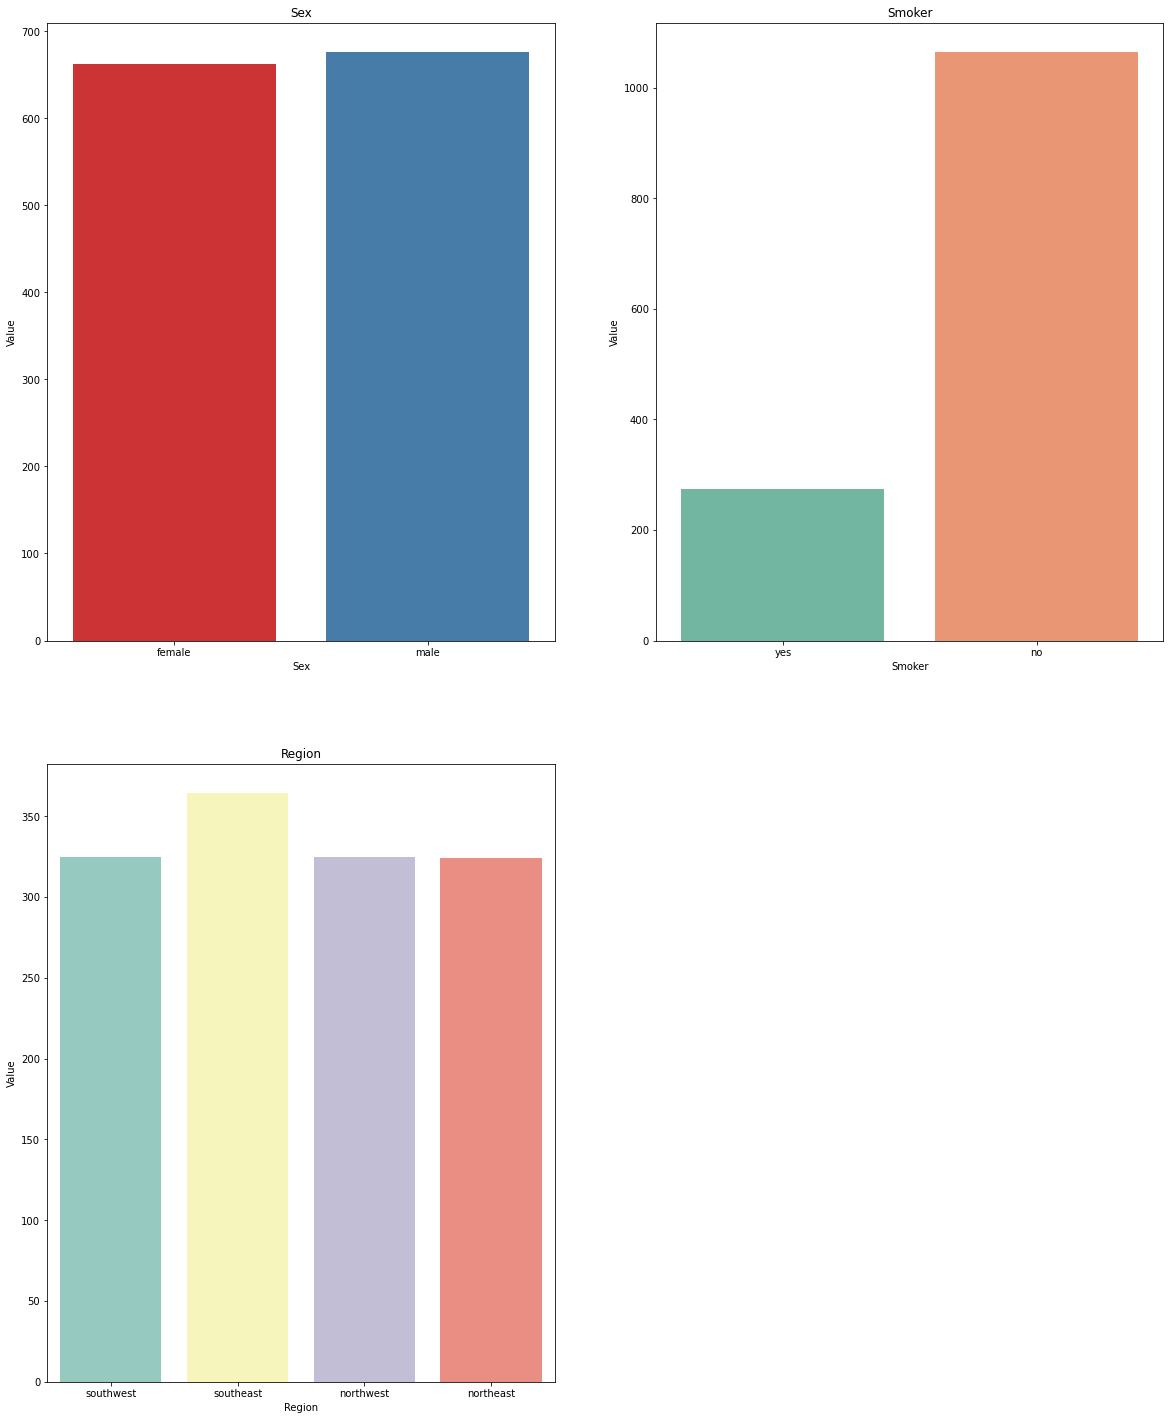

In [5]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(2,2,1)
ax1= fig.add_subplot(2,2,2)
ax2= fig.add_subplot(2,2,3)

sns.countplot(x = 'sex',data=df,palette = 'Set1',ax=ax0)
ax0.set_title('Sex')
ax0.set_xlabel('Sex')
ax0.set_ylabel('Value')

sns.countplot(x = 'smoker',data=df,palette = 'Set2',ax=ax1)
ax1.set_title('Smoker')
ax1.set_xlabel('Smoker')
ax1.set_ylabel('Value')

sns.countplot(x = 'region',data=df,palette = 'Set3',ax=ax2)
ax2.set_title('Region')
ax2.set_xlabel('Region')
ax2.set_ylabel('Value')

plt.show()

# Kesimpulan
1. Data laki-laki lebih banyak dari perempuan, tetapi perbedaannya jumlahnya sangatlah sedikit.
2. Banyak orang yang tidak merokok
3. Lebih banyak orang yang berasal dari southeast.

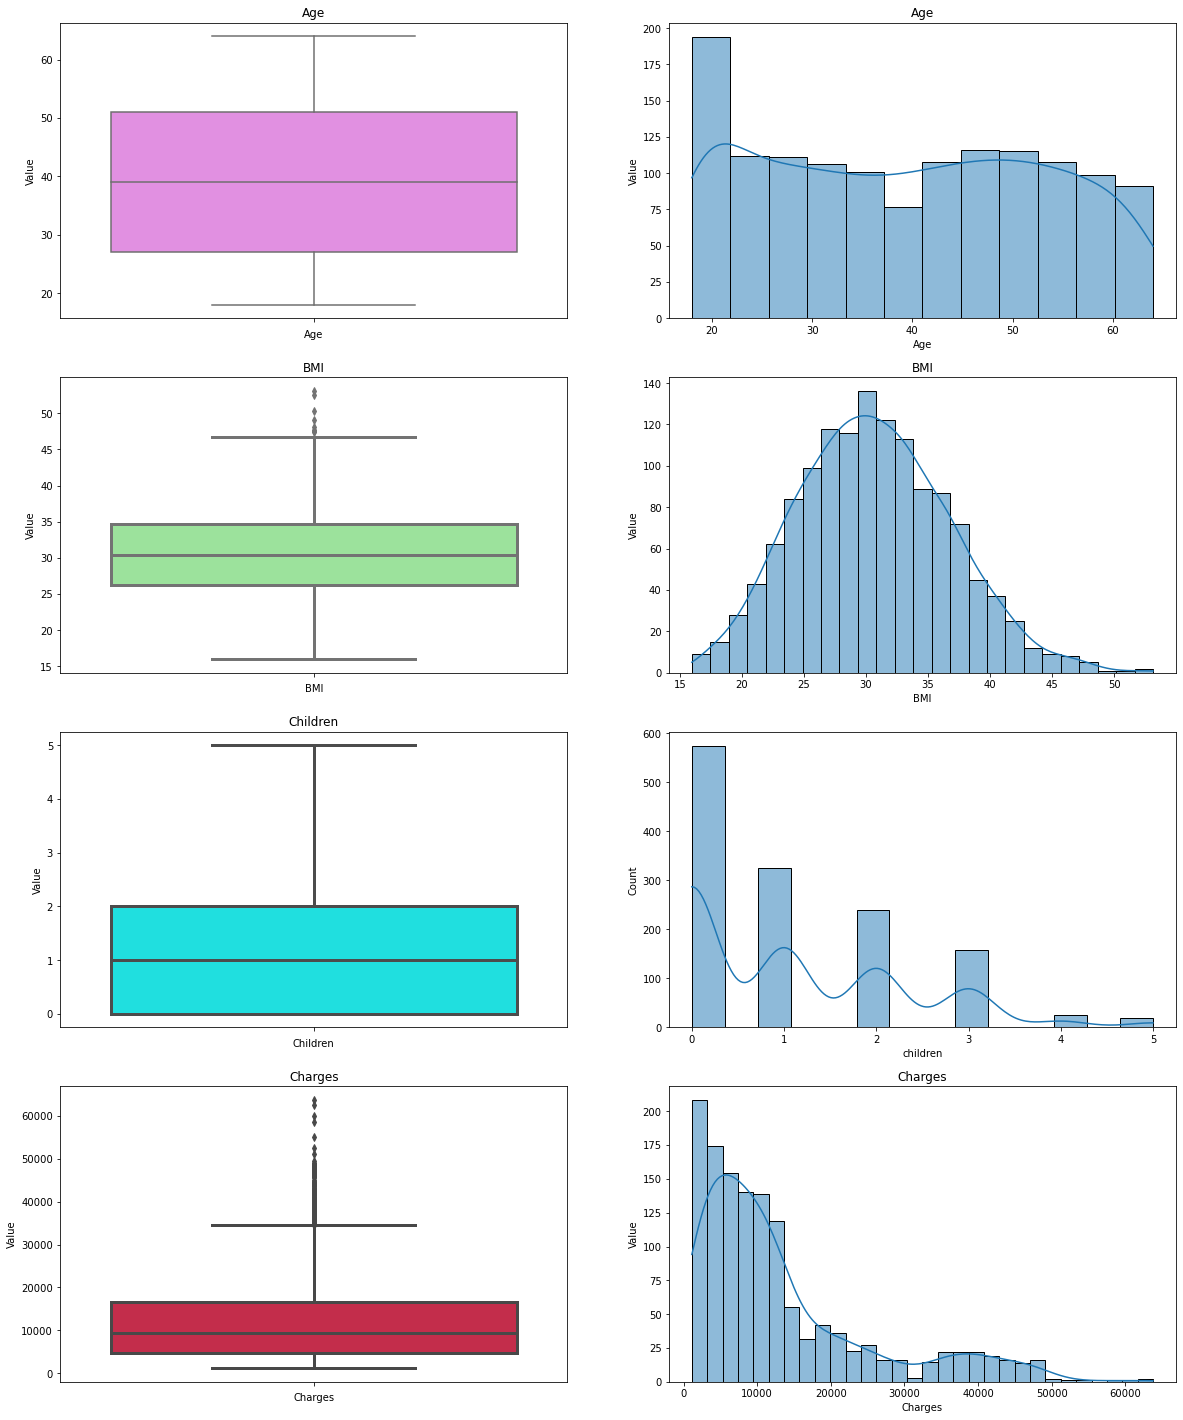

In [6]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(4,2,1)
ax1= fig.add_subplot(4,2,2)
ax2= fig.add_subplot(4,2,3)
ax3= fig.add_subplot(4,2,4)
ax4= fig.add_subplot(4,2,5)
ax5= fig.add_subplot(4,2,6)
ax6= fig.add_subplot(4,2,7)
ax7= fig.add_subplot(4,2,8)

sns.boxplot(y = df['age'], color = 'violet',ax=ax0)
ax0.set_title('Age')
ax0.set_xlabel('Age')
ax0.set_ylabel('Value')

sns.histplot(data=df,x='age',kde=True,ax=ax1)
ax1.set_title('Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Value')

sns.boxplot(y = df['bmi'], color = 'lightgreen',linewidth=3,ax=ax2)
ax2.set_title('BMI')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Value')

sns.histplot(data=df,x='bmi',kde=True,ax=ax3)
ax3.set_title('BMI')
ax3.set_xlabel('BMI')
ax3.set_ylabel('Value')

sns.boxplot(y=df['children'], color='cyan', linewidth=3, ax=ax4)
ax4.set_title('Children')
ax4.set_xlabel('Children')
ax4.set_ylabel('Value')

sns.histplot(data=df,x='children',kde=True,ax=ax5)
ax4.set_title('Children')
ax4.set_xlabel('Children')
ax4.set_ylabel('Value')

sns.boxplot(y=df['charges'], color='crimson', linewidth=3, ax=ax6)
ax6.set_title('Charges')
ax6.set_xlabel('Charges')
ax6.set_ylabel('Value')

sns.histplot(data=df,x='charges',kde=True,ax=ax7)
ax7.set_title('Charges')
ax7.set_xlabel('Charges')
ax7.set_ylabel('Value')

plt.show()

# Kesimpulan:
1. Mayoritas orang berumur di atas 25 sampai dengan umur 50
2. Banyak yang memiliki BMI di angka 25-35
3. Banyak orang yang mempunyai anak 0-3. (0 berarti tidak mempunyai anak)
4. Mayoritas biaya yang dibayarkan ke asuransi berkisar antara 500-1700 dolar

# Bivariate

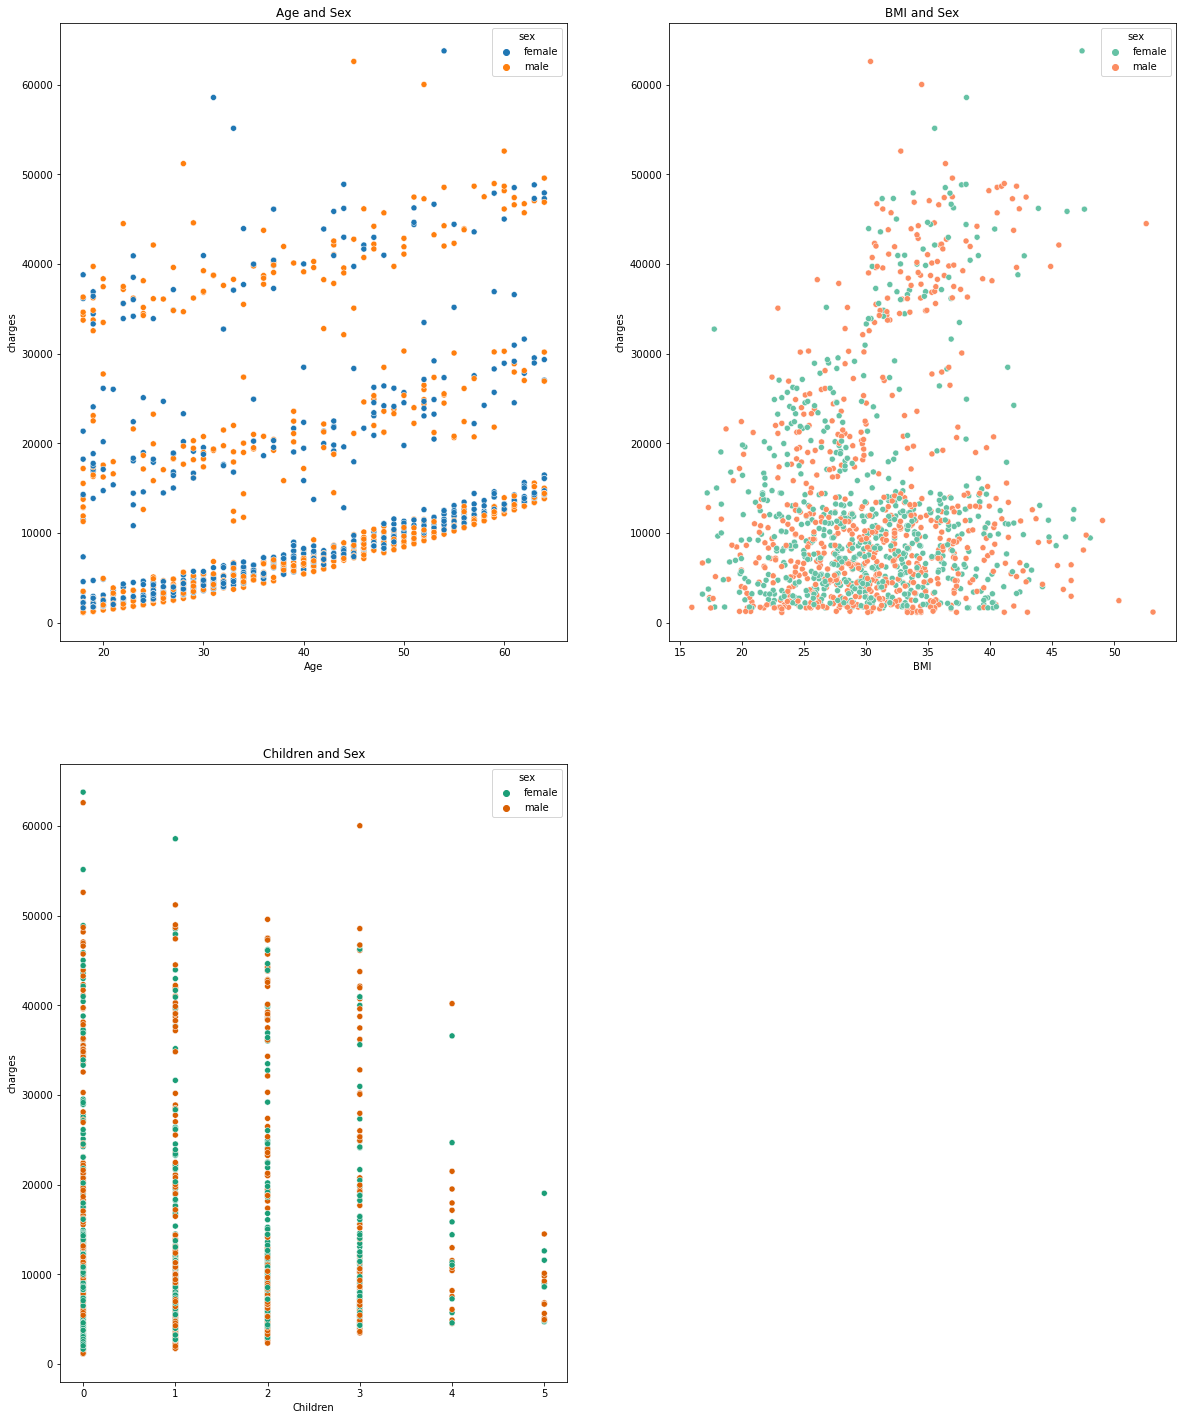

In [7]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(2,2,1)
ax1= fig.add_subplot(2,2,2)
ax2= fig.add_subplot(2,2,3)

sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'sex',palette = 'tab10', ax = ax0)
ax0.set_title('Age and Sex')
ax0.set_xlabel('Age')

sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'sex', palette = 'Set2', ax = ax1)
ax1.set_title('BMI and Sex')
ax1.set_xlabel('BMI')

sns.scatterplot(data = df, x = 'children', y = 'charges', hue = 'sex', palette = 'Dark2', ax = ax2)
ax2.set_title('Children and Sex')
ax2.set_xlabel('Children')

plt.show()

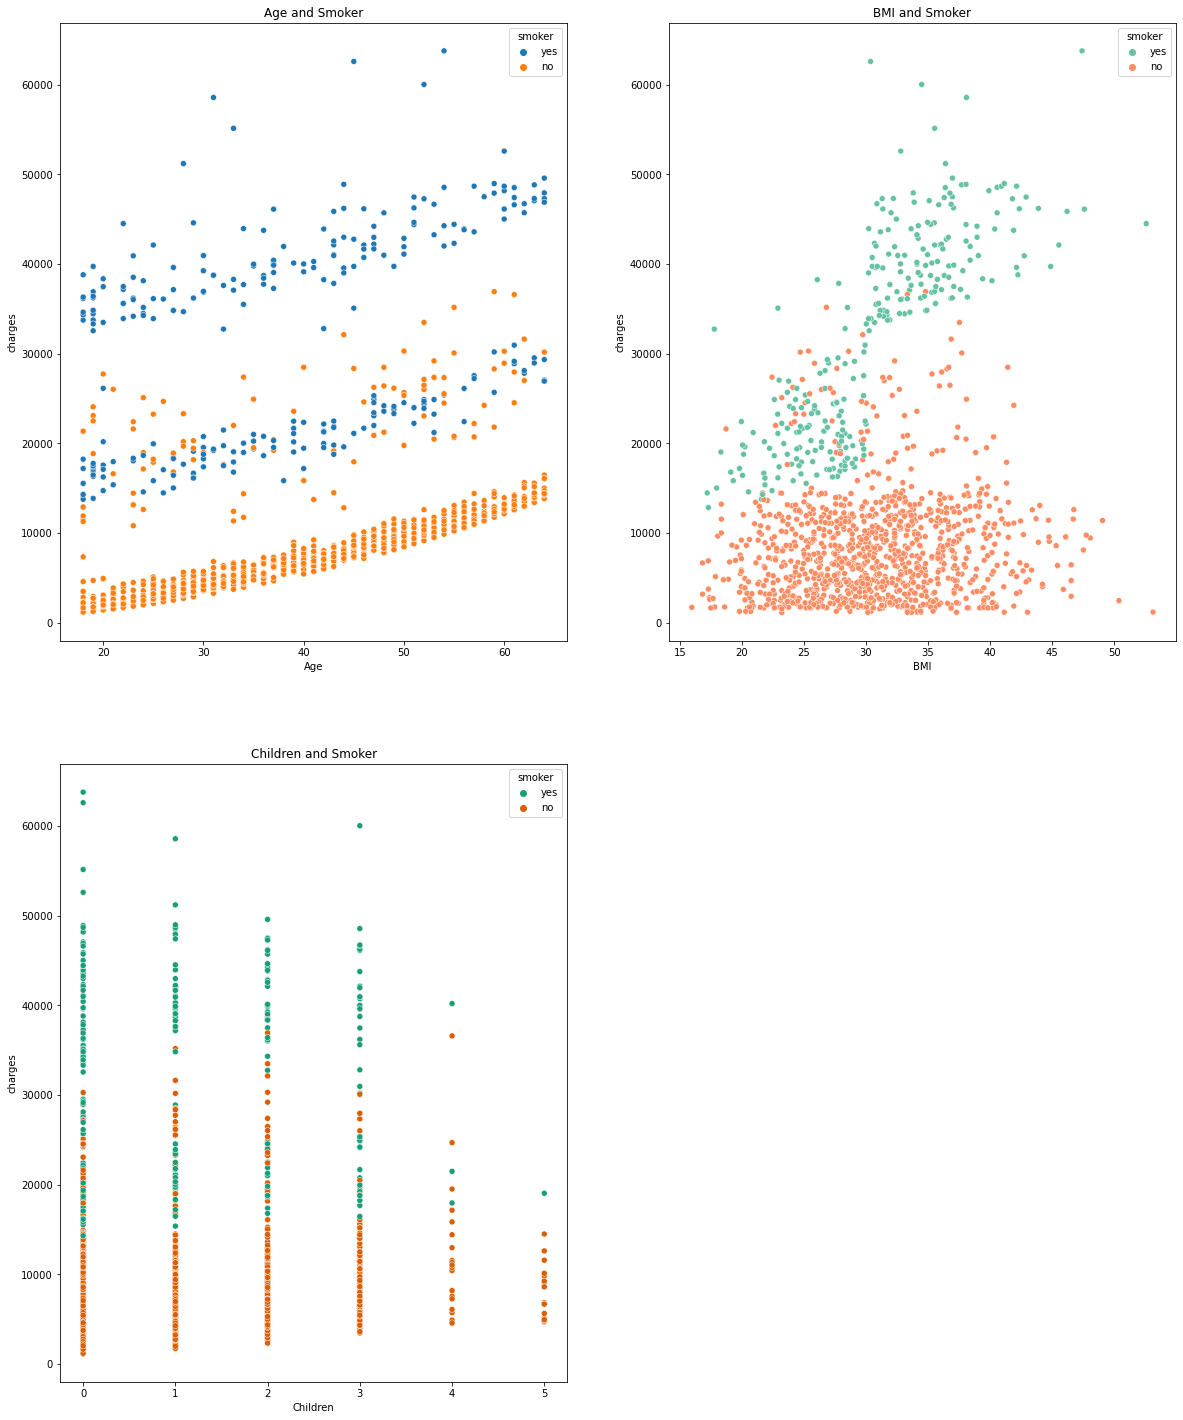

In [8]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(2,2,1)
ax1= fig.add_subplot(2,2,2)
ax2= fig.add_subplot(2,2,3)

sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'smoker',palette = 'tab10', ax = ax0)
ax0.set_title('Age and Smoker')
ax0.set_xlabel('Age')

sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'smoker', palette = 'Set2', ax = ax1)
ax1.set_title('BMI and Smoker')
ax1.set_xlabel('BMI')

sns.scatterplot(data = df, x = 'children', y = 'charges', hue = 'smoker', palette = 'Dark2', ax = ax2)
ax2.set_title('Children and Smoker')
ax2.set_xlabel('Children')

plt.show()

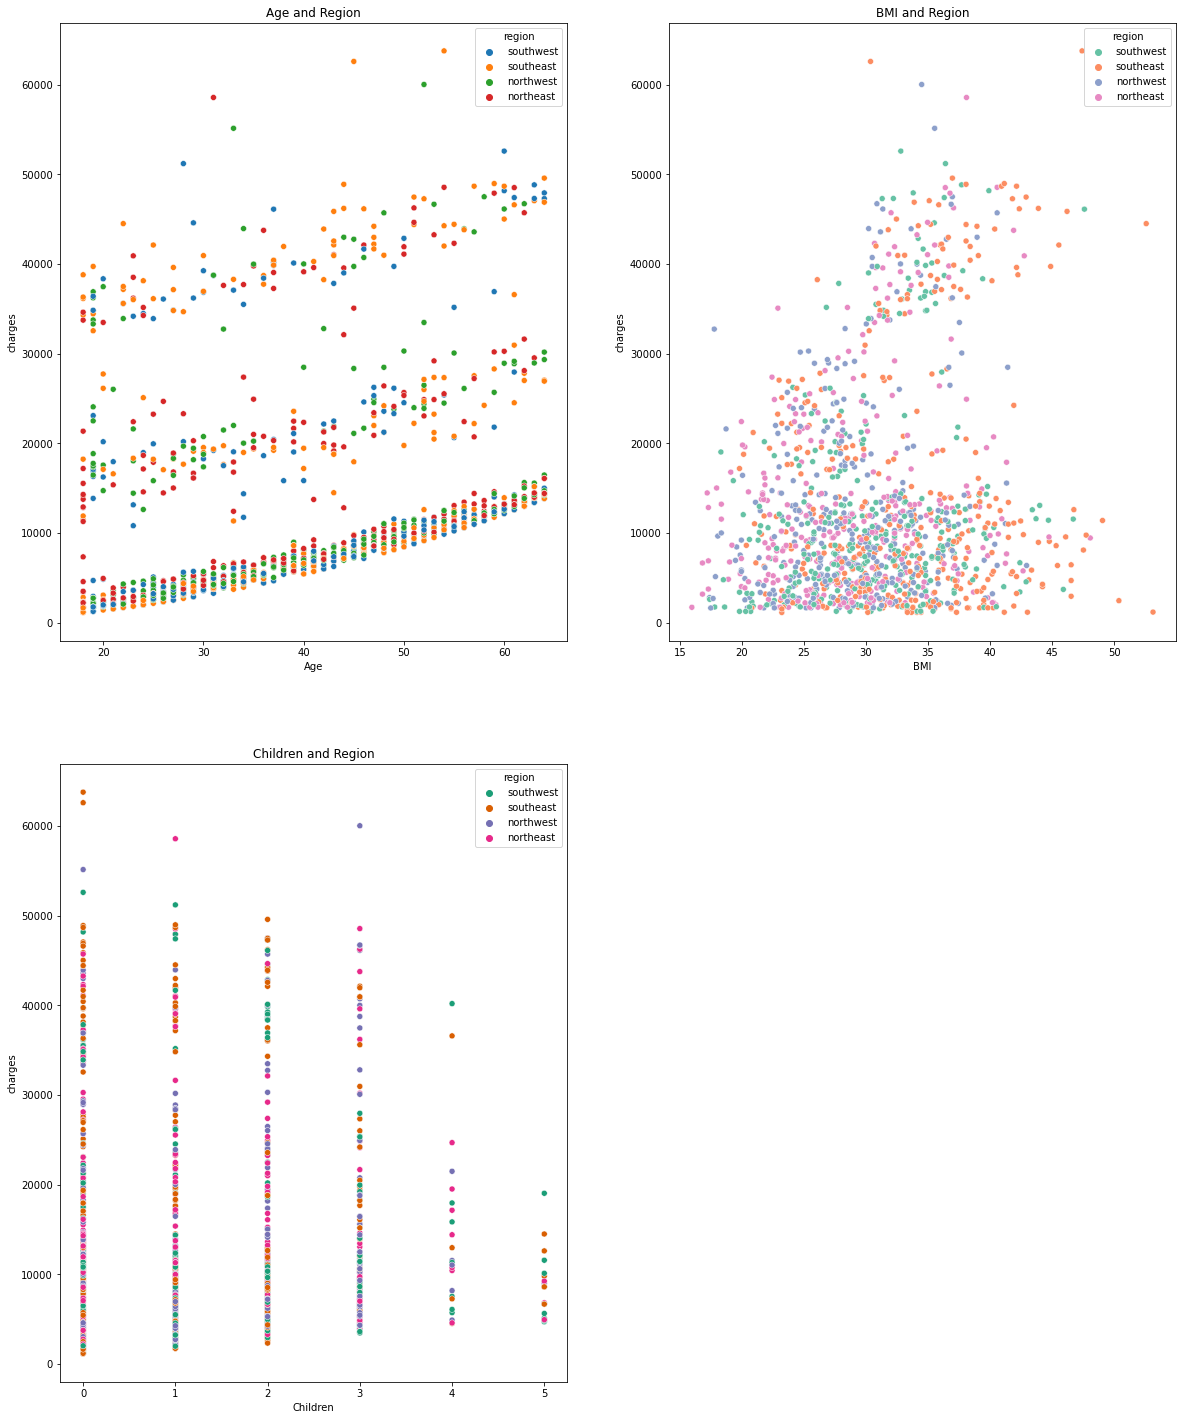

In [9]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(2,2,1)
ax1= fig.add_subplot(2,2,2)
ax2= fig.add_subplot(2,2,3)

sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'region',palette = 'tab10', ax = ax0)
ax0.set_title('Age and Region')
ax0.set_xlabel('Age')

sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'region', palette = 'Set2', ax = ax1)
ax1.set_title('BMI and Region')
ax1.set_xlabel('BMI')

sns.scatterplot(data = df, x = 'children', y = 'charges', hue = 'region', palette = 'Dark2', ax = ax2)
ax2.set_title('Children and Region')
ax2.set_xlabel('Children')

plt.show()

# Kesimpulan:
Fitur yang paling berpengaruh adalah Smoker.

# Multivariate

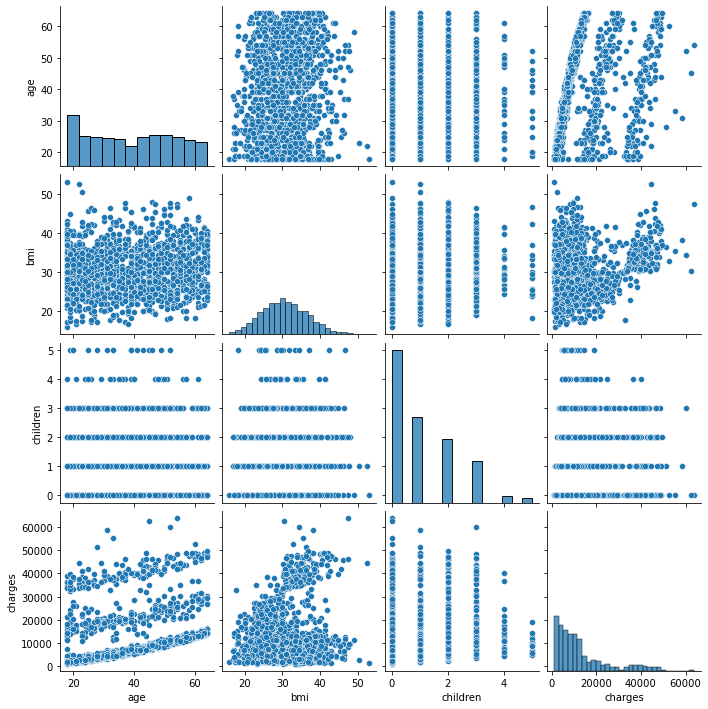

In [10]:
sns.pairplot(df)
plt.show()

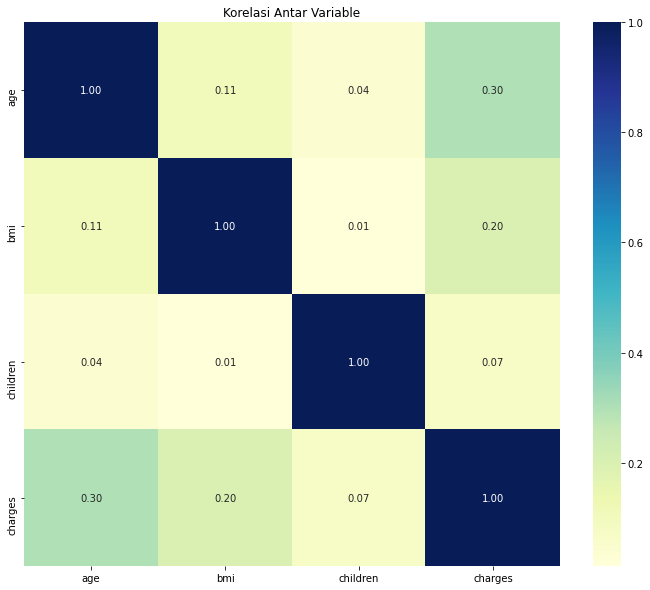

In [11]:
df_con = df[['age','bmi','children','charges']]
plt.figure(figsize = (12,10))
plt.title('Korelasi Antar Variable')
sns.heatmap(df_con.corr(), fmt='.2f', annot=True, cmap= "YlGnBu");

# Kesimpulan:
Tidak terdapat korelasi yang kuat antar variabel

# Data Preprocessing

In [12]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [13]:
X = df[['age','sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model

In [15]:
reg = LinearRegression().fit(X_train, y_train)

In [16]:
y_pred = reg.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.7694415927057693
